<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/main/ML/SHAP_diabetes_DS_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP(SHapley Additive exPlanations)

In [35]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt


In [36]:
shap.initjs()

In [37]:
# diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [38]:
print(X[:10])

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0

In [39]:
print(y[:10])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [40]:
# train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (353, 10)
Shape of X_test: (89, 10)


In [42]:
# Initialize Randomforest model
model = RandomForestRegressor(random_state=42, n_estimators=100)
# train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the model (optional)
# print(f"Model R^2 Score: {model.score(X_test, y_test):.2f}")

### Initialize SHAP Explainer

SHAP requires an explainer object to interpret the model.

In [43]:
# Initialize SHAP explainer - TreeExplainer
explainer = shap.TreeExplainer(model)


In [44]:
# Calculate SHAP values for the test data.
shap_values = explainer(X_test)

In [55]:
shap_values.values[:5]

array([[  2.13513337,   1.10551385, -12.36970167,  -5.31315276,
         -8.28374448,  -0.70644462,  -3.11319349,   2.55924381,
         15.8329815 ,  -2.22711708],
       [  1.86390213,   1.19437346,  26.34852242,   9.25190773,
          1.01599494,  -0.30767127,  -0.19894502,  -3.64646699,
        -17.58432948,  -0.73776949],
       [  3.1637365 ,  -1.21786233, -16.72197315,  -3.91313688,
         -7.07075251,  -1.0219421 ,  -8.4164364 ,  -1.86564167,
         36.80750561,  -3.40397865],
       [  2.1574236 ,   0.76778429,  23.05336997,  19.82131905,
         -1.83838378,   0.86647694,   7.24434596,   6.92666001,
         31.19242155,   9.13810082],
       [ -4.59083893,  -6.07414128, -26.92115507,  -0.8976574 ,
         -0.60685   ,   4.34235897,  -0.31782166,   3.29008934,
        -14.75689027,  -0.6575753 ]])

 The below Summary plot shows the global importance of features across all predictions.

Summary Plot:


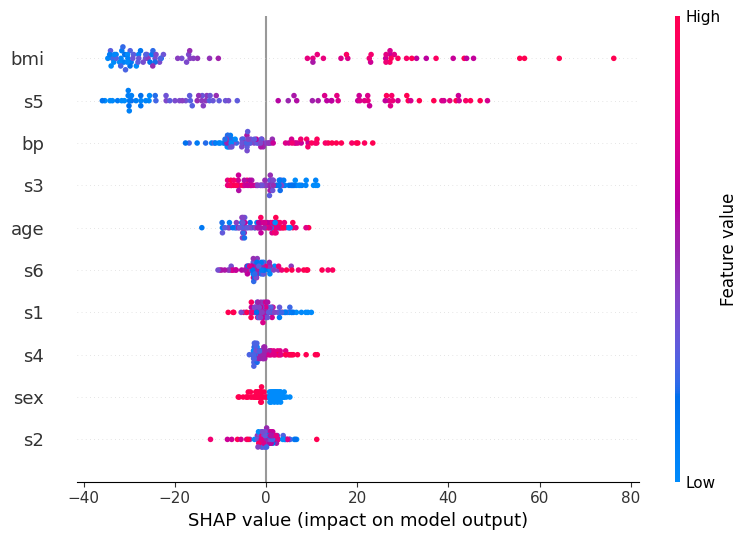

In [46]:

# Visualizations
print("Summary Plot:")
shap.summary_plot(shap_values, X_test)

Feature dependence plot, highlights how the value of a specific feature affects predictions.

Feature Dependence Plot for BMI


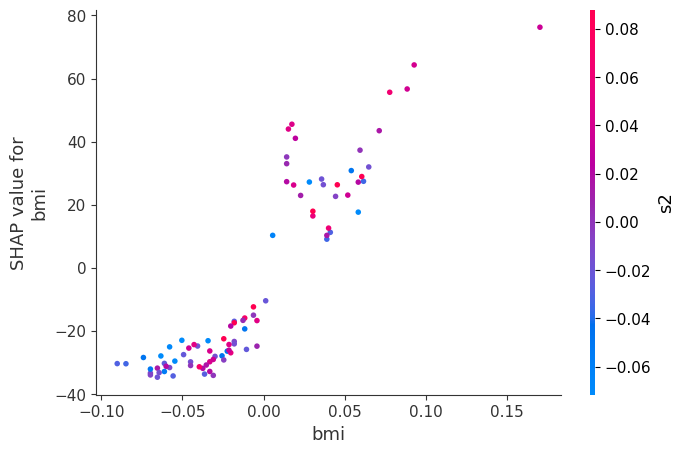

In [52]:
print("Feature Dependence Plot for BMI")

shap.dependence_plot("bmi", shap_values.values, X_test)

### What the Plot Shows
x-axis: Values of the bmi feature (e.g., Body Mass Index).
- Points represent individual data samples.


y-axis: SHAP values for bmi.

- Positive SHAP values mean bmi increases the prediction (e.g., higher risk).
- Negative SHAP values mean bmi decreases the prediction.

Color Gradient: Represents the values of the interaction feature.

SHAP automatically selects the feature most strongly interacting with bmi here, s2 which is blood glucose sugar level.

#### Force Plot from SHAP library is used to explain a given specific prediction

Extract the relevant values from the shap explanation object (shap_values) before passing them to shap.force_plot.



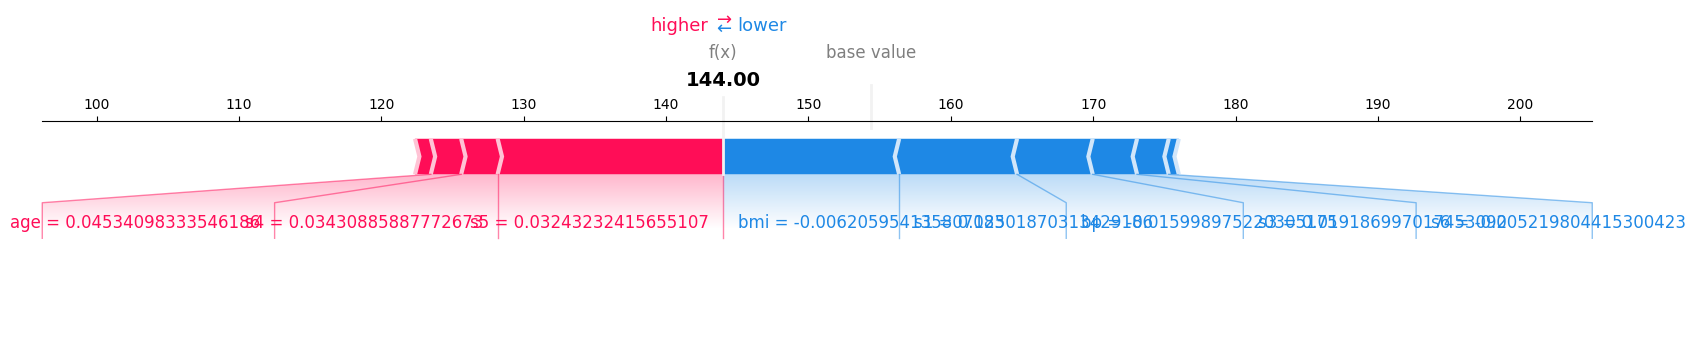

In [49]:

# Extract the base value and shap values for a single prediction
base_value = explainer.expected_value[0]

# SHAP values for the first prediction
shap_values_first_prediction = shap_values.values[0]

# Feature values for the first prediction
features_first_prediction = X_test.iloc[0]

# Generate force plot
shap.force_plot(base_value, shap_values_first_prediction, features_first_prediction, matplotlib=True)


Bar plot from shap libarary shows global importance of features.

Bar Plot:


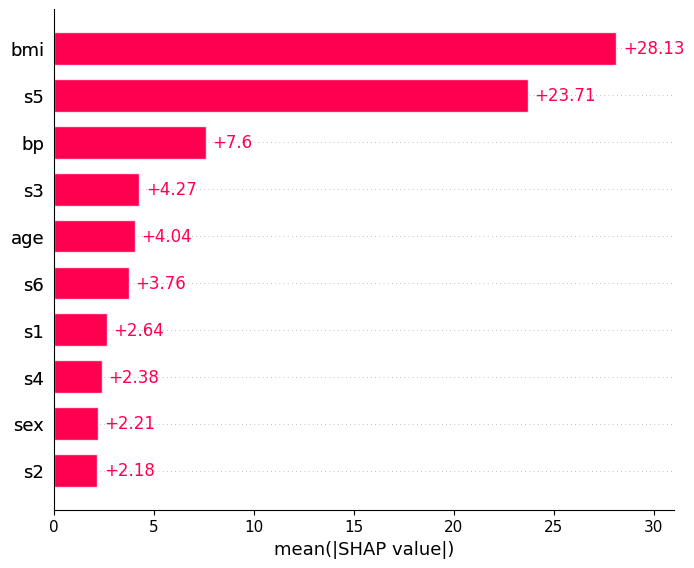

In [50]:
print("Bar Plot:")
shap.plots.bar(shap_values)

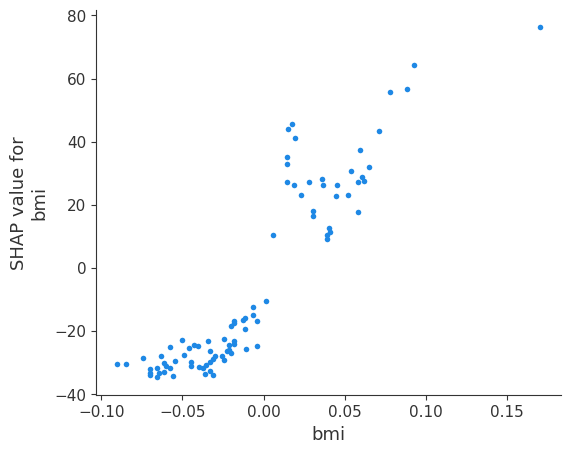

In [54]:
shap.dependence_plot("bmi", shap_values.values, X_test, interaction_index=None)
